In [50]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import elephant.conversion as conv
import neo 
import quantities as pq
from elephant.statistics import instantaneous_rate
import neo
from quantities import Hz, s, ms

In [23]:
path='/media/maria/DATA1/Documents/NeuroMatchAcademy2020_dat/unzipped_files'

In [24]:
files=os.listdir(path)
print(files)

['Lederberg_2017-12-09.tar', 'Cori_2016-12-14.tar', 'Cori_2016-12-17.tar', 'Cori_2016-12-18.tar', 'Forssmann_2017-11-01.tar', 'Forssmann_2017-11-02.tar', 'Forssmann_2017-11-04.tar', 'Forssmann_2017-11-05.tar', 'Hench_2017-06-15.tar', 'Hench_2017-06-16.tar', 'Hench_2017-06-17.tar', 'Hench_2017-06-18.tar', 'Lederberg_2017-12-05.tar', 'Lederberg_2017-12-06.tar', 'Lederberg_2017-12-07.tar', 'Lederberg_2017-12-08.tar', 'Lederberg_2017-12-10.tar', 'Lederberg_2017-12-11.tar', 'Moniz_2017-05-15.tar', 'Moniz_2017-05-16.tar', 'Moniz_2017-05-18.tar', 'Muller_2017-01-07.tar', 'Muller_2017-01-08.tar', 'Muller_2017-01-09.tar', 'Radnitz_2017-01-08.tar', 'Radnitz_2017-01-09.tar', 'Radnitz_2017-01-10.tar', 'Radnitz_2017-01-11.tar', 'Radnitz_2017-01-12.tar', 'Richards_2017-10-29.tar', 'Richards_2017-10-30.tar', 'Richards_2017-10-31.tar', 'Richards_2017-11-01.tar', 'Richards_2017-11-02.tar', 'Tatum_2017-12-06.tar', 'Tatum_2017-12-07.tar', 'Tatum_2017-12-08.tar', 'Tatum_2017-12-09.tar', 'Theiler_2017-10-1

In [25]:
selected_recording='Richards_2017-10-31.tar'

midbrain_area='SCs'
frontal_area='MOs'

In [26]:
path_to_rec=path+'/'+selected_recording

In [27]:
spk_tms=np.load(path_to_rec+'/'+'spikes.times.npy')
spk_amps=np.load(path_to_rec+'/'+'spikes.amps.npy')
spk_clusters=np.load(path_to_rec+'/'+'spikes.clusters.npy')
clust_brain_id=np.load(path_to_rec+'/'+'clusters.originalIDs.npy')
#brain_id=np.load(path_to_rec+'/'+'channels.sitePositions.npy')

In [32]:
def probes_loc_one_file(one_mouse_folder):
    path='/media/maria/DATA1/Documents/NeuroMatchAcademy2020_dat/unzipped_files/'
    dat=pd.read_csv(path+one_mouse_folder+'/'+'channels.brainLocation.tsv', sep='\t')
    #dat['Mouse_Folder'] =str(one_mouse_folder)
    return dat
locs=probes_loc_one_file(selected_recording)
print(locs.shape)

(748, 4)


In [36]:
print(locs[locs['allen_ontology']==midbrain_area])

     ccf_ap  ccf_dv  ccf_lr allen_ontology
618  9376.0  1899.6  4883.1            SCs
619  9408.0  1899.6  4883.1            SCs
620  9392.0  1880.3  4877.9            SCs
621  9424.0  1880.3  4877.9            SCs
622  9376.0  1860.9  4872.7            SCs
..      ...     ...     ...            ...
679  9424.0  1300.7  4722.6            SCs
680  9376.0  1281.4  4717.4            SCs
681  9408.0  1281.4  4717.4            SCs
682  9392.0  1262.1  4712.2            SCs
683  9424.0  1262.1  4712.2            SCs

[66 rows x 4 columns]


In [37]:
print(locs[locs['allen_ontology']==frontal_area])

     ccf_ap  ccf_dv  ccf_lr allen_ontology
110  2670.7  2760.5  5004.7            MOs
111  2708.3  2741.2  4974.4            MOs
112  2685.7  2741.2  4997.0            MOs
113  2700.7  2721.8  4989.4            MOs
114  2678.1  2721.8  5012.0            MOs
..      ...     ...     ...            ...
215  2891.0  1717.3  5179.7            MOs
216  2868.4  1717.3  5202.3            MOs
217  2906.0  1698.0  5172.0            MOs
218  2883.4  1698.0  5194.7            MOs
219  2898.3  1678.6  5187.0            MOs

[110 rows x 4 columns]


In [18]:
choose_neuron_0=618
choose_neuron_1=111

In [34]:
def extract_spike_train(choose_neuron,spk_clusters,spk_tms):
    spk_ids=np.where(spk_clusters==choose_neuron)
    spk_tms_one_neuron=spk_tms[spk_ids]
    print(spk_tms_one_neuron)
    return spk_tms_one_neuron
n0_times=extract_spike_train(choose_neuron_0,spk_clusters,spk_tms)
n1_times=extract_spike_train(choose_neuron_1,spk_clusters,spk_tms)
print(n0_times[-1])

[1.83817219e+00 2.51670864e+00 2.60207570e+00 ... 2.59968078e+03
 2.63170536e+03 2.86753147e+03]
[2.36523333e+00 3.48346667e+00 3.86693333e+00 ... 2.96573793e+03
 2.96589797e+03 2.96595787e+03]
2867.531474601181


(1, 29682)


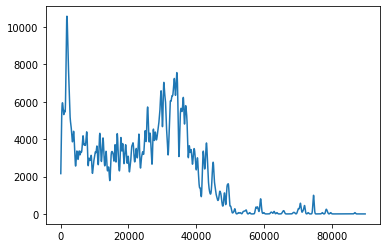

In [124]:
import elephant.conversion as conv
import neo 
import quantities as pq
from elephant.statistics import instantaneous_rate
import neo
from quantities import Hz, s, ms

#https://elephant.readthedocs.io/en/latest/reference/conversion.html

final_timepoint=spk_tms[-1]
def filter_spikes(spk_times,bin_time,final_time_point):
    spk_tr=neo.SpikeTrain(spk_times*pq.ms, t_stop=final_time_point)
    r=instantaneous_rate(spk_tr, sampling_period=0.000033*pq.s, kernel='auto', cutoff=5.0)
    #binned = conv.BinnedSpikeTrain(spk_tr, binsize=bin_time * pq.s,t_start=0 * pq.s).to_array()
    return r #binned

bin_time=0.1
r_0=filter_spikes(n0_times,bin_time,final_time_point)
print(binned_0.shape)
import matplotlib.pyplot as plt

plt.plot(r_0)
plt.show()
#plt.eventplot(binned_0)
#plt.show()

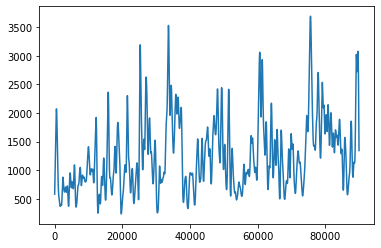

In [126]:
r_1=filter_spikes(n1_times,bin_time,final_time_point)
plt.plot(r_1)
plt.show()

In [2]:
#behavior
mot_en=np.load('/media/maria/DATA1/Documents/NeuroMatchAcademy2020_dat/unzipped_files/Richards_2017-10-31.tar/face.motionEnergy.npy')

In [3]:
print(mot_en.shape)
print(mot_en)
29682*4

(118268, 1)
[[-0.00647372]
 [ 0.09287304]
 [ 0.08490538]
 ...
 [ 1.36147391]
 [ 1.69262977]
 [ 1.8606976 ]]


118728

In [5]:
mot_timestamps=np.load('/media/maria/DATA1/Documents/NeuroMatchAcademy2020_dat/unzipped_files/Richards_2017-10-31.tar/face.timestamps.npy')

(118268, 2)
[[0.00000000e+00 1.36147226e+01]
 [1.00000000e+00 1.36399684e+01]
 [2.00000000e+00 1.36652142e+01]
 ...
 [1.18265000e+05 2.99930658e+03]
 [1.18266000e+05 2.99933183e+03]
 [1.18267000e+05 2.99935707e+03]]
[0.02524578 0.02524578 0.02524578 ... 0.02524578 0.02524578 0.02524578]
[118267.           2999.35707372]


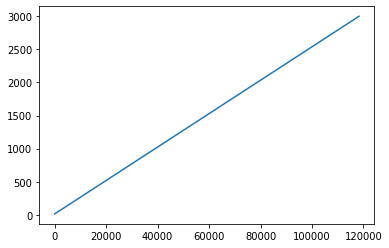

In [17]:
print(mot_timestamps.shape)
print(mot_timestamps)
plt.plot(mot_timestamps[:,1])
print(np.diff(mot_timestamps[:,1]))
print(mot_timestamps[-1])

In [ ]:
print(np.load('/media/maria/DATA1/Documents/NeuroMatchAcademy2020_dat/unzipped_files/Richards_2017-10-31.tar/face.timestamps.npy'))

In [138]:
print(n0_times)
print(n0_times.shape)

[1.83817219e+00 2.51670864e+00 2.60207570e+00 ... 2.59968078e+03
 2.63170536e+03 2.86753147e+03]
(6047,)


In [139]:
print(spk_tms.shape)

(4703292, 1)


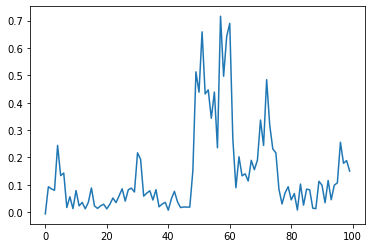

In [142]:
plt.plot(mot_en[:100])

In [33]:
trial_times=np.load('/media/maria/DATA1/Documents/NeuroMatchAcademy2020_dat/unzipped_files/Richards_2017-10-31.tar/trials.intervals.npy')
print(trial_times)

[[ 59.37929481  65.95545912]
 [ 65.96575778  69.50249116]
 [ 69.51253654  73.08582237]
 [ 73.09550189  78.00456997]
 [ 78.01508295  82.79628506]
 [ 82.80610314  87.1568333 ]
 [ 87.16816346  91.63813722]
 [ 91.64809325  93.96952355]
 [ 93.98022641  96.03474647]
 [ 96.04508014 101.03457593]
 [101.04482629 106.95263097]
 [106.96268209 111.28591686]
 [111.29589795 117.30855691]
 [117.31914235 121.43442908]
 [121.44458375 123.85065407]
 [123.86153354 128.43316596]
 [128.44358174 132.91962313]
 [132.92996858 137.63433736]
 [137.64465926 141.35312662]
 [141.3636713  143.55153901]
 [143.56172598 146.11874369]
 [146.12908702 152.61619733]
 [152.62685461 157.84885359]
 [157.85935269 161.7594181 ]
 [161.76967268 165.36783456]
 [165.37808915 170.65625832]
 [170.66697115 175.50316344]
 [175.5137682  177.69889189]
 [177.70912051 183.99665882]
 [184.00798113 186.24974081]
 [186.25994287 190.74964335]
 [190.76107493 192.84956945]
 [192.85988441 201.08407451]
 [201.09504332 204.91940712]
 [204.92965174

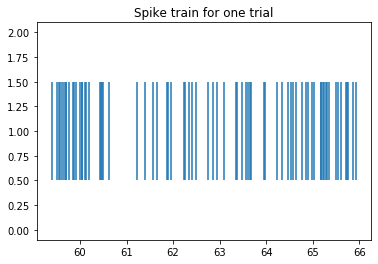

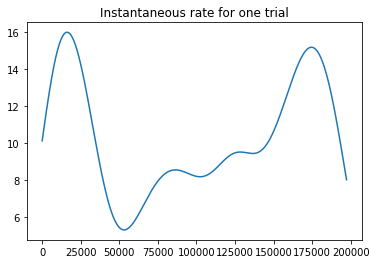

In [69]:
neuron_dat=n0_times

def select_trial(trial_index,trial_times,neuron_dat,mot_en):
    neuron_spikes=neuron_dat
    spks_range = np.bitwise_and(neuron_spikes>=trial_times[trial_index][0],neuron_spikes<=trial_times[trial_index][1])
    subset=neuron_spikes[spks_range]
    spk_tr=neo.SpikeTrain(subset*pq.s,t_stop=trial_times[trial_index][1])
    plt.eventplot(spk_tr)
    plt.title('Spike train for one trial')
    plt.show()
    r=instantaneous_rate(spk_tr,t_start=trial_times[trial_index][0]*pq.s,t_stop=trial_times[trial_index][1]*pq.s, sampling_period=3.3333333333333e-5*pq.s, kernel='auto', cutoff=5.0)
    plt.plot(r)
    plt.title('Instantaneous rate for one trial')
    plt.show()

select_trial(0,trial_times,neuron_dat,mot_en)